<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/2_Logistic_Regression_and_SoftMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2.2: Logistic and Softmax Regressions

# Logistic Regression

## Definition


*  Logistic regression is a model (fancy word to say equation) that relates  ***categorical*** output to one or more ***numerical*** inputs.

* For example one would use logistic regression to predict the category of a person  (Child or Adult) from the values of Weight and Height.

* In the figure below the model is represented by the green line that separates between the two categories of points.

![](https://drive.google.com/uc?export=view&id=14HVZfwLtmAg1UWaadoK2HoRuDTxAGNZj)


* The line equation is given as follows

\begin{equation}
Height = - Weight + 205 \iff  Weight + Height  - 205 = 0.
\end{equation}


* The category of the person is obtained by the following function of $Weight$ and $Height$  

\begin{equation}
f(Weight,Height) = Weight + Height  - 205
\end{equation}

* such that:
  
  * $f(Weight,Height) \geq 0$ means the point defined with the coordinates $(Weight,Height)$  lies ***above*** the green line and  belongs to  ***Adults***;
  
  * $f(Weight,Height) \leq 0$ the point is ***below*** the green line and the person is classified amongst ***Children***;
  
  * $f(Weight,Height) = 0$ the person lies ***on*** the green line and is considered to be between the two categories .
  
  
* The quantity $f(Weight,Height)$ is refered as the ***score*** (that a given person is an Adult in our example) and it is translated into ***probability***   through the ***Logistic Function*** as follows


\begin{equation}
P(y = Adult | Weight, Height) = \frac{1}{1 + e^{-f(Weight,Height)}}.
\end{equation}
  

* Indeed we can see from the plot below of the logistic function that any $z \in {\rm I\!R}$ is turned into an output $\in [0,1]$.

*  Formally speaking  binary logistic regression is the probability that $\bf{x} = [x_1,\ldots,x_d]^T$ belongs to class $1$ 

\begin{equation}
P(y = 1| \bf{x}) = \frac{1}{1 + e^{-(\bf{w}^T\bf{x} + b})},
\end{equation}

* where $w^T \in  {\rm I\!R}^d$ is the vector of weights and $b \in  {\rm I\!R}$ is the bias.


* Please note the following

  * The modele computes for a given observation $\bf{x}$  the belonging probability to one class ***only***;
  
  * The belonging probability to the other class can be deduced by the complementary rule of probability 
  
  \begin{equation}
  P(y = 0 | \bf{x}) = 1 -P(y = 1| \bf{x}) .
  \end{equation}


![](https://drive.google.com/uc?export=view&id=1383aDQg_sGYeYUhk2pFwNNX5TRIzJlwh)

# Softmax Regression





## Definition

* Softmax regression is the extension  of logistic regression over $C$ classes.





![](https://drive.google.com/uc?export=view&id=1zs42I6MSrdWTO-dcuGGU4ijy_qi7II2g)

* To deal with $C$ classes problem we define $C$ binary regressions. Just like any kind of sectarism, each category discriminates its specific class over all the others.

![](https://drive.google.com/uc?export=view&id=1GiF3jgiRmllA0NYO0_dIvgttKBuIc07n)



  
  *  So for a given data point $\bf{x} \in {\rm I\!R^d}$ softmax regression  calculates the belonging probability to every class and packes it into one vector 
  
  
  \begin{equation}
  \begin{bmatrix}
  P(y = 0 | \bf{x})\\
  P(y = 1 | \bf{x})\\
  \vdots\\
  P(y = C-1 | \bf{x})
  \end{bmatrix}
  \end{equation}
  
  * such as these probabilities sum to $1$.




* The vector of probabilities above is obtained through the vector of scores $\bf{s}$  

\begin{equation}
\bf{s} = 
\begin{bmatrix}
s_1\\
\vdots\\
s_k
\end{bmatrix}
= \bf{W} \bf{x} + b = 
\begin{bmatrix}
w_{11} & \ldots & w_{1d}\\
\vdots & \ddots & \vdots\\
w_{k1} & \ldots & w_{kd}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots\\
x_d
\end{bmatrix} + 
\begin{bmatrix}
b_1\\
\vdots\\
b_k
\end{bmatrix}
\end{equation}


* where $\bf{W} \in  {\rm I\!R^{k \times d}}$ and   $\bf{b} \in  {\rm I\!R^k}$ are respectively the matrix of weights and  the vector of biais.

* The $k^{th}$ row of $\bf{W}$ with the $k^{th}$ element of $\bf{b}$ list the parameters of the logistic regression that classifies the elements of the class $k$ against the others. 



* The vector $\bf{s}$ is then transformed into vector of probabilities $\bf{\hat{p}} \in  {\rm I\!R^k}$ as follows


\begin{equation}
\bf{\hat{p}}=
\begin{bmatrix}
\hat{p}_1\\
\vdots\\
\hat{p}_k\\
\end{bmatrix}
=
\begin{bmatrix}
\frac{e^{s_1}}{\sum_{i = 1}^{k} e^{s_i}}\\
\vdots\\
\frac{e^{s_k}}{\sum_{i = 1}^{k} e^{s_i}}\\
\end{bmatrix}.
\end{equation}


* The function that transformes each score $s_j$ from the vector $\bf{s}$  into probability is called ***softmax***.

* Note however to transform $s_j$ into $\hat{p}_j$ the ***scalar*** softmax function requires the other scores $\{s_i, i \neq j \}$ 


\begin{equation}
softmax(j,\bf{s}) = \frac{e^{s_j}}{\sum_{i = 1}^{k} e^{s_i}}.
\end{equation}

* The ***vector*** version of softmax function is defined as
\begin{equation}
softmax(\bf{s}) = 
\begin{bmatrix}
softmax(1,\bf{s})\\
\vdots\\
softmax(k,\bf{s})
\end{bmatrix}. 
\end{equation}


* Finally the softmax of any $\bf{x}$ is compactly expressed as 

\begin{equation}
\hat{p} =  softmax(\bf{W} \bf{x} + \bf{b}).
\end{equation}



## Formalization

* Let $\bf{X}$ be a dataset of $n$ examples described through $d$ variables and $\bf{y}$  the corresponding vector of outputs.

\begin{equation}
\bf{X} = 
\begin{bmatrix}
x_{11} & \ldots & x_{1d}\\
\vdots & \ddots  & \vdots \\
x_{n1} &\ldots & x_{nd}
\end{bmatrix},
\quad \bf{y} = 
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}.
\end{equation}


* Every $i^{th}$ entry of $\bf{y}$ represents the  category of the $i^{th}$ row in $\bf{X}$.

* Let $k$ be the number of categories. The value of every $y_i$ is an integer between  $1$ and $k$.

* In order to train the softmax regression from the data  we first  transform $\bf{y}$ into matrix of probabilities  

\begin{equation}
\bf{P} =
\begin{bmatrix}
p_{11} & \ldots & p_{1k}\\
\vdots & \ddots & \vdots \\
p_{n1} & \ldots & p_{nk}
\end{bmatrix}
\end{equation}

* where each entry $\bf{P}_{ij}$ describes the probability that the $i^{th}$ example of $\bf{X}$ belongs to the class $j$.

* It is easy to see that for every row of $\bf{P}$ only one entry will be set to $1$ while all the others will be at $0$ in which case rows of $\bf{P}$ are said to be ***One Hot***. 

* The matrix  $\bf{P}$ can be used to represent membership to several classes with different probabilities. 




* Let $\bf{\hat{P}}$ be the matrix of probabilities estimated through softmax regression for some values of $\bf{W}$ and $\bf{b}$ 

\begin{equation}
\bf{\hat{P}} = 
\begin{bmatrix}
\hat{p}_{11} & \ldots & \hat{p}_{1k}\\
\vdots & \ddots & \vdots \\
\hat{p}_{n1} & \ldots & \hat{p}_{nk}
\end{bmatrix}=
softmax(\bf{X}W^T + \bf{b}^T) 
\end{equation}


* Please note the dimensionality of $\bf{X} \bf{W}^T$ is $n \times k$ which makes the sum with $\bf{b}^T$ impossible in classical linear algebra. 

* To avoid duplicating $\bf{b}^T$ $n$ times we introduce the operation of ***broadcasting*** which allows $\bf{b}^T$ to distribute on every row of $\bf{X} \bf{W}^T$.

* Broadcasting is not a mathematical operation but it is widespread amongst Machine Learning people also it is supported by Numpy.


* Lasty we define $\bf{\hat{y}}$ as the vector of estimated classes 

\begin{equation}
\bf{\hat{y}} =
\begin{bmatrix}
\hat{y}_1\\
\vdots\\
\hat{y}_n\\
\end{bmatrix} =
\begin{bmatrix}
argmax(\bf{\hat{P}}_{1,:})\\
\vdots\\
argmax(\bf{\hat{P}}_{n,:})\\
\end{bmatrix} - 1,
\end{equation}


* where $argmax(\bf{x})$ is a function that for a given vector $\bf{x}$ returns the index of the biggest value.

## Loss Function

* Now we get to serious things.  We need a function that informs us about the performance of our model and thus of the parameters that shape it.

* In classification tasks the loss function is known as ***negative log-likelihood*** or ***cross entropy*** (if you're logarithm-phobic)  

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log(\hat{p}_{i,j}),
\end{equation}

* where:

  * $p_{i,j}$ is the ***true*** probability that the $i^{th}$ data point $\bf{X}_{i,:}$ belongs to the $j^{th}$ class;
  * $\hat{p}_{i,j}$ is the ***estimated*** probability that the $i^{th}$ data point $\bf{X}_{i,:}$ belongs to the $j^{th}$ class.
 

* Frighten  not, sit and ponder over the wisdom of the above equation  :
   * If  $P_{i,:}$ are one-hot vectors then  $p_{i,y_i} = 1$  and $\{p_{i,j} = 0, j \neq y_i\}$ thus the sum $\sum_{j = 1}^k - p_{i,j} \log(\hat{p}_{i,j}) = - \log(\hat{p}_{i,y_i})$.
  * If the predicted probability $\hat{p}_{i,y_i}$ tends to $1$ its $\log$  tends to $0$ (see red plot below if you don't believe me);
  * If however the predicted probability $\hat{p}_{i,y_i}$ tends to $0$ then its $\log$  will tend towards $- \infty$ (see red plot below);
  * from this we get that the less precise we predict $\hat{p}_{i,y_i}$ the bigger will be $- \hat{p}_{i,j}$ and vice versa (see blue plot below).
  * The operation  $ \frac{1}{n}\sum_{i = 1}^n$ produces an average of the negative log-likelihoods.
  
  *  In the case  $P_{i,:}$ are not one-hot vectors the mechanisms described above still apply.
 

![](https://drive.google.com/uc?export=view&id=1rcmxwPDQq-ABDc4dYCpfwuK8W2_5p-Fb)

## Estimation of $\bf{W}$ and $\bf{b}$

* The parameters are estimated with gradient descent over the negative log-likelihood loss function.

* In Linear Regression tutorial we introduced the Gradient Descent algorithm.

* The algorithm is pretty straightforward: keep moving the values of $\bf{W}$ and $\bf{b}$ until we reach the minimum of $J$.

* The direction into which the parameters are moved is given by the gradient $\nabla_{\bf{W}, \bf{b}} J$.

* If you were frightened the first time you met with Negative Log-likehood loss function, you should trust your first feelings more often. 

* Indeed the computation of derivatives w.r.t to elements of $\bf{W}$ and $\bf{b}$ can seem complex.

* To make computation simple we take you back to high school derivative rules and transport you far beyond.




### Derivative, Gradient and Jacobian

* Let $y = f(x)$ be a given function. 

* We want to consider the derivation of $f$ for different dimensionalities of $x$ and $y$ : 

  1. for $x,y \in  {\rm I\!R}$, $f$ is represented by the left graph (1) below such that:
  
    * each variable is associated to a coloured circle;
    * the dependency of $y$ to $x$ is expressed by the arrow from $x$ to $y$;
    * the derivative of $y$ w.r.t $x$ is simply 
   \begin{equation}
   \frac{dy}{dx}.
   \end{equation}

  2. for $\bf{x} \in {\rm I\!R^3}, y \in {\rm I\!R}$, $f$ is represented by the middle graph (2) below such that: 
  
    * input and output variables are associated to same coloured circles;
    * the dependency of $y$ to $x_1,x_2,x_3$ is expressed by the $3$ arrows from $\bf{x}$ to $y$
    * the partial derivatives of $y$ w.r.t $\bf{x}$ are given by the ***gradient*** 
    
     \begin{equation}
    \nabla_{\bf{x}} y = 
    \begin{bmatrix}
    \frac{\partial y}{\partial x_1}\\
    \frac{\partial y}{\partial x_2}\\
    \frac{\partial y}{\partial x_3}
    \end{bmatrix}.
   \end{equation}

  3. for $\bf{x} \in {\rm I\!R^3}, \bf{y} \in {\rm I\!R^2}$, $f$ is represented by the right graph (3) such that:   
  
      * outputs $y_1$ and $y_2$ are both computed from inputs $x_1,x_2,x_3$;
      * we spot $6$ arrows corresponding to the dependency of $y_1$ and $y_2$ to $x_1,x_2,x_3$;
      * the partial derivatives between $y_1, y_2$ and $x_1,x_2,x_3$ are summarized by a matrix called ***Jacobian***
      
      \begin{equation}
      \begin{bmatrix}
      \frac{\partial y}{\partial x}
      \end{bmatrix} =
      \begin{bmatrix}
      \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \frac{\partial y_1}{\partial x_3}\\
      \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \frac{\partial y_2}{\partial x_3}
      \end{bmatrix}.
      \end{equation}
   

![](https://drive.google.com/uc?export=view&id=1DGpOEvSqF9Z67_0jmmG933W9-E5x2GeS)

### Playing with Derivatives, Gradients and Jacobians

* By now you are equipped to derive functions mapping between inputs and outputs of ***arbitrary*** sizes.

* Push it further and consider the  composite function $z = g(y)$ and $y = f(x)$ where $z \in {\rm I\!R}$:

   1. for $x, y \in {\rm I\!R}$, $g$ can be represented by the graph 
   
      ![](https://drive.google.com/uc?export=view&id=1R5YxMMMKou69AHs66XG3iEy2F1cHUT9c)
      
     * Derivative of $z$ w.r.t $x$ is obtained with the chain rule 
     
     \begin{equation}
     \frac{dz}{dx} = \frac{dz}{dy} \times \frac{dy}{dx}.
     \end{equation}
     
   2. for vectorial $x,y$ for example $\bf{x} \in {\rm I\!R^3}, \bf{y} \in {\rm I\!R^2}$ the function $g$ would be represented as    
   
      ![](https://drive.google.com/uc?export=view&id=1b8EJlpwROp4jlx9UZNAEEfK6BP-BWdkS)
   
    * Partial derivatives of $z$ w.r.t $x_1,x_2,x_3$ are obtained by the generalizations of chain rule
    
    \begin{equation}
    \frac{\partial z}{\partial x_1} = \left( \frac{\partial z}{\partial y_1} \times \frac{\partial y_1}{\partial x_1} \right) + \left( \frac{\partial z}{\partial y_2} \times \frac{\partial y_2}{\partial x_1} \right) = \sum_{j = 1}^2  \frac{\partial z}{\partial y_j} \times \frac{\partial y_j}{\partial x_1}
    \end{equation}
    
     * In other words the above chain rule first computes  partial derivatives of $y_1, y_2$ w.r.t $x_1$ multiplied by the partial derivative of $z$ w.r.t $y_j$ and sum everything. Same principle applies for other partial derivatives of $z$ w.r.t $x_2,x_3$
     
     \begin{equation}
     \frac{\partial z}{\partial x_2} = \sum_{j = 1}^2  \frac{\partial z}{\partial y_j} \times \frac{\partial y_j}{\partial x_2},\\
     \frac{\partial z}{\partial x_3} = \sum_{j = 1}^2  \frac{\partial z}{\partial y_j} \times \frac{\partial y_j}{\partial x_3}.\\
     \end{equation}
     
    * Partial derivatives above define the gradient of $z$ w.r.t $\bf{x}$ which magically happens to be
    
    \begin{equation}
    \nabla_{\bf{x}} z =
      \begin{bmatrix}
      \frac{\partial y}{\partial x}
      \end{bmatrix}^T \nabla_{\bf{y}} z.
    \end{equation}
    
     * If you do not believe me here is the detailed version of the formulae 
     
     \begin{equation}
     \nabla_{\bf{x}} z = 
     \begin{bmatrix}
      \frac{\partial y_1}{\partial x_1} & \frac{\partial y_2}{\partial x_1}\\
      \frac{\partial y_1}{\partial x_2} & \frac{\partial y_2}{\partial x_2}\\
      \frac{\partial y_1}{\partial x_3} & \frac{\partial y_2}{\partial x_3}
      \end{bmatrix}
         \begin{bmatrix}
    \frac{\partial z}{\partial y_1}\\
    \frac{\partial z}{\partial y_2}
    \end{bmatrix}.
     \end{equation}
   
    * The nightmare is now over : congratulations you know how to tame gradients on beasty composite functions.
    
    * Is it really a nightmare ? all we are doing is multiplying gradient by transposed jacobian.
    
    * This mecanism is the heart of the ***Backpropagation Algorithm*** used to train Deep Neural Networks.


## Gradient of Negative Log Likelihood

### Complexity of the Computation

* Back to reality : we want to minimize $J$ through Gradient Descent Algorithm.

* As the name suggests Gradient Descent requires the computation of $\nabla_{\theta} J$ with $\theta = [\bf{W}, \bf{b}]$.

*  Quick reminder:

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log(\hat{p}_{i,j}) = \frac{-1}{n}\sum_{i = 1}^n \sum_{j = 1}^k p_{i,j} \log \left( \frac{e^{\bf{W}_{j,:}\bf{X}_{:,i}^T + b_j } }{\sum_{l = 1}^k e^{\bf{W}_{l,:}\bf{X}_{:,i}^T + b_l} }  \right).
\end{equation}

* This frightening equation shows that observations $\bf{X}_{:,i}$, probabilities $p_{i,j}$ and parameters $\bf{W}_{i,j}, b_i$ are all  intertwined.

* This jungle of expressions makes derivation of $J$ w.r.t $\bf{W}, \bf{b}$  laborious.

* To see clearer consider the following basic example:

  * Dataset $\bf{X}$ with $2$ observations and $2$ variables;
  * Each data point belongs to a distinct class and the number of classes is $2$;
  * The loss function $J$ can be visualized by the computational graph below 

 ### Loss Function as Computational Graph
 
 * The computational graph of $J$ is organized into ***layers*** where:
    * Bottom layer contains parameters of the model (weights and bias);
    * Note that parameters are ***flattened*** in the sens we no longer care about the ***shapes*** of $\bf{W}$ and $\bf{b}$;
    * Next layer computes scores for every observation and every class; 
    * Note that arrows between layers are present only when an explicit relationship exists between the variables;
    * The $3^{rd}$ layer is made up by estimated probabilities $\hat{p}_{i,c}$ that depend on the previous layer but also on real probabilities $p_{i,c}$ with  no dependency;
    * Last layer is the loss function which depends on $\hat{p}_{i,c}$ and $p_{i,c}$;
    


![](https://drive.google.com/uc?export=view&id=1hfk-ntkWJouCv-tD57-Tf5tLotibx9CF)

### Mecanism of Computation

* The gradient of $J$ w.r.t parameters $\theta = [w_{11},w_{12},w_{21},w_{22},b_1,b_2]$ is obtained by applying the multivariable chaine rule throughout the different layers from up to down. The process is executed in the following steps:

  * Calculate $\nabla_{\hat{p}} J$, Gradient of $J$ w.r.t to estimated probabilities $\hat{p} = [\hat{p}_{1,1},\hat{p}_{1,2},\hat{p}_{2,1},\hat{p}_{2,2}]$;
  
  * Calculate $[\partial \hat{p}/\partial s]$, Jacobian between  layers of estimated probabilities $\hat{p}$ and estimated scores $s = [s_{1,1},s_{1,2},s_{2,1},s_{2,2}]$;
  * Calculate $\nabla_{s} J$,  Gradient of $J$ w.r.t to scores $s$ with the multivariable chain rule
  \begin{equation}
  \nabla_{s} J = 
  \begin{bmatrix}
  \frac{\partial \hat{p}}{\partial s}
  \end{bmatrix}^T
  \nabla_{\hat{p}} J.
  \end{equation}
  * Calculate  $[\partial \hat{s}/\partial \theta]$ the Jacobian between the layers of scores $s$ and parameters $\theta$;
  
  * Calculate $\nabla_{\theta} J$ with the multivariable chaine rule
  \begin{equation}
  \nabla_{\theta} J = 
  \begin{bmatrix}
  \frac{\partial s}{\partial \theta}
  \end{bmatrix}^T
  \nabla_{s} J.
  \end{equation}  
  

### Expression of Jacobians and Gradients  
  
  * We arrive at the end of the process (aka nightmare).
  
  * To make implementation easy we need to express Gradient and Jacobians as compact as possible.
  
  * The computation objects we will use are:
  
    * $\bf{X}$: matrix of $n$ examples with $d$ variables.
    * $\bf{\Psi} = [\bf{X} \vert 1] \in  {\rm I\!R^{n \times (d+1)}}$: concatenation of $\bf{X}$ with column vector of $1$s.  
    * $C$: number of classes.
    * $\bf{P} \in {\rm I\!R^{n \times C}}$: matrix of $n$ examples and their belonging probabilities to $C$ classes. 
    * $\bf{W} \in {\rm I\!R^{C \times d}}, \bf{b} \in {\rm I\!R^{C}}$: respectively weight matrix and bias vector.
    * $\bf{\Theta} = [\bf{W}\vert \bf{b}]$: matrix of all parameters.
    * $\Theta_{idx} =  \{[1,1],\ldots,[1,d+1],[2,1],\ldots,[C,d+1]\}$: set of indices associated to each element of $\bf{\Theta}$ (from top to down and left to right). This set of indices is useful to flatten $\bf{\Theta}$ in order to manipulate weights and bias as one vector. The first and last elements of $\bf{\Theta}$ are accessed as $\bf{\Theta}_{\Theta_{idx}[1]}$ and $\bf{\Theta}_{\Theta_{idx}[C \times (d+1)]}$.
    * $\bf{S} = \bf{\Psi}  \bf{\Theta}^T \in {\rm I\!R^{n \times C}}$: matrix of $C$ scores for the $n$ examples in $\bf{X}$  
    
  \begin{equation}
  \bf{S} = 
  \begin{bmatrix}
  \sum_{f = 1}^{d+1} \Psi_{1f} \Theta_{1f} & \cdots & \sum_{f = 1}^{d+1} \Psi_{1f} \Theta_{Cf}\\
  \vdots & \ddots & \vdots\\
  \sum_{f = 1}^{d+1} \Psi_{nf} \Theta_{1f} & \cdots & \sum_{f = 1}^{d+1} \Psi_{nf} \Theta_{Cf}
  \end{bmatrix}.
  \end{equation}
  
     * $S_{idx} = \{[1,1], [1,2],\ldots,[1,C],[2,1],\ldots,[2,C],\ldots, [n,C]\}$: set of indices in $\bf{S}$. 
     
    * $\bf{\hat{P}} = softmax(\bf{S}) \in  {\rm I\!R^{n \times d}}$: matrix of $n$ examples and their estimated belonging probabilities to the $C$ classes.
    * The flattening of $\bf{\hat{P}}$ and $\bf{P}$ is handled with the set of indices $\hat{P}_{idx}$ and $P_{idx}$ both equal to $S_{idx}$ as they all refer to matrices of dimensionality $n \times C$.   
    
  * The matrices $\bf{\Theta}, \bf{S}, \bf{\hat{P}}, \bf{P}$ and $J$ are respectively flattened and organized bottom-up  

![](https://drive.google.com/uc?export=view&id=1Noeu0NV_iQ6lcRX7wx1nWYLjW6j2cC-a)

* The derivations are carried out from top to down.

* First, we compute the gradient of $J$ w.r.t to $\bf{\hat{P}}$

\begin{equation}
\nabla_{\hat{p}} J = 
\begin{bmatrix}
\frac{P_{P_{idx}[1]}}{\hat{P}_{P_{idx}[1]}}\\
\vdots\\
\frac{P_{P_{idx}[n \times C]}}{\hat{P}_{P_{idx}[n \times C]}}
\end{bmatrix}.
\end{equation}

* Next, we go for the jacobian between the elements of $\bf{\hat{P}}$ and $\bf{S}$
  * As a start, consider softmax function on one vector of scores $[s_1,\ldots,s_C]$ 
\begin{equation}
\hat{p}_i = \frac{e^{s_i}}{\sum_{j = 1}^{C} e^{s_j}}. 
\end{equation}

  * Partial derivative of $p_i$ w.r.t to $s_j$ is
  \begin{equation}
  \frac{\partial \hat{p}_i}{\partial s_j} =        1_{\{i = j\}} \hat{p}_i - \hat{p}_i \hat{p}_j
  \end{equation}
  
  * where $1_{\{i = j\}}$ is the ***indicator function***  equals to $1$ when the condition $i = j$ is satisfied. In other words, when the score $s_j$ is in the nominator of $\hat{p}_i$. If $s_j$  is in the denominator of $\hat{p}_i$ we get $i \neq j$ and the indicator is equal to $0$. 
  
  * Let $i = [i_1,i_2]\in \hat{P}_{idx}$ and  $j = [j_1, j_2]\in \hat{S}_{idx}$ be two coordinate of indices respectively referring to entries of $\bf{\hat{P}}$ and $\bf{S}$. The Jacobian $[\frac{\partial \hat{p}}{\partial s}]$ is the matrix of partial derivatives of any $\hat{p}_{i_1, i_2}$ w.r.t to any $s_{j_1,j_2}$. The generic expression can be obtained from the vectorial case with an additional indicator function. 
  
  \begin{equation}
 \frac{\partial \hat{p}_i}{\partial s_j} = 
  1_{\{i_1 = j_1\}} \left[  \left(1_{\{i_2 = j_2\}} \hat{p}_{i}   \right) - \left( \hat{p}_i \hat{p}_j \right)  \right].
  \end{equation}
  
     * Keep in mind that $i$ and $j$ are ***coordinates of indices*** and  thus $\hat{p}_i = \hat{p}_{i_1,i_2}$. The  indicator function $1_{\{i_1 = j_1\}} = 0$ when no computational link exist between $s_j$ and $p_i$. For example it is quite obvious that partial derivative $\frac{\partial \hat{p}_{1,1}}{\partial s_{2,1}} = 0$ as the score $s_{2,1}$ appears nowhere in the expression of $\hat{p}_{1,2}$.
         
     * To populate the Jacobian $[\frac{\partial\hat{p}}{\partial s}]$ follow the following process: iterate over the values of $i \in \hat{P}_{idx}$. For each value of $i$ iterate over all the values of $j \in \hat{S}_{idx}$ and compute $\frac{\partial \hat{p}_i}{\partial s_j}$.
     
* Time to chain rule, Gradient of $J$ w.r.t to $s$ is

\begin{equation}
\nabla_{s} J = 
\begin{bmatrix}
  \frac{\partial \hat{p}}{\partial s} 
  \end{bmatrix}^T \nabla_{\hat{p}} J.
\end{equation}

* Last floor ! get  the Jacobian between  elements of $\bf{S}$ and $\bf{\Theta}$:
 * Let $i \in S_{idx}$ and $j \in \theta_{idx}$ be two coordinates of indices, the partial derivative of $s_i$ w.r.t $\theta_j$ is
 
 \begin{equation}
 \frac{\partial s_i}{\partial \theta_j} = 1_{ \{  \{i_2 = j_1\}  or  \{j_1 = d+1\}  \}} \Psi_{i_1,j_1}, 
 \end{equation}
 
 * the indicator function  $1_{ \{  \{i_2 = j_1\}  or  \{j_1 = d+1\}  \}}$ contains $2$ conditions linked with a logical ***or*** which means that the function equals to one if ***at least*** one condition holds. The result should be easy to get if you refer to the explicit expression of $\bf{S}$ above.
 
* Finish him chain rule ! Gradient of $J$ w.r.t to $\theta$ is

\begin{equation}
\nabla_{\theta} J = 
\begin{bmatrix}
\frac{\partial s}{\partial \theta}
\end{bmatrix}^T
\nabla_{s} J.
\end{equation}

* You win.

  
  

## Implementation in Python 

### Generation of Dataset
* Simulate $\bf{X}$ with $200$ examples, $2$ variables and $2$ categories;
* $\bf{y}$ contains $100$ labels of each category;
* $\bf{W}, \bf{b}$ are initialized at $\bf{0}$
* ***plot_softmax_model(X,y,W,b,lines)***: python function to plot the data in different colors with the separating lines if ***lines = True***.

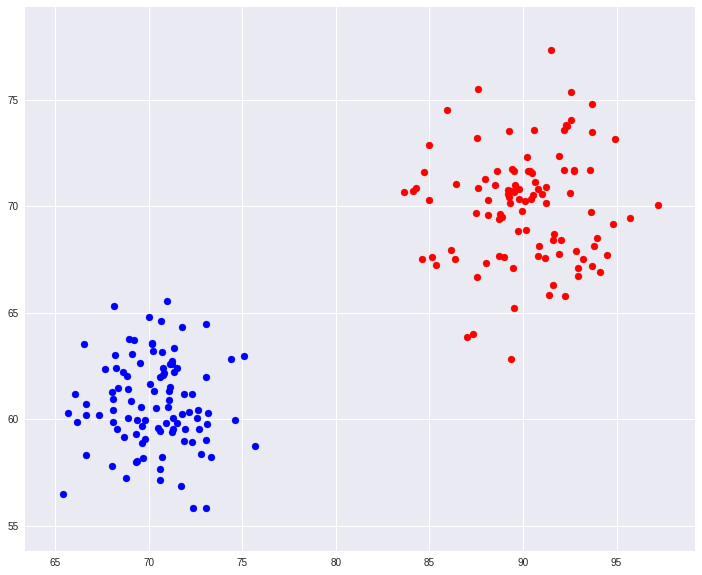

In [0]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
cat_1 = np.random.multivariate_normal(np.array([70,60]), 
                                         np.array([[5,0],
                                                   [0,5]]),
                                                   n)
cat_2 = np.random.multivariate_normal(np.array([90, 70]),
                                       np.array([[7,0],
                                                 [0,7]]),
                                                 n)
X = np.vstack([cat_1, cat_2])
y = np.hstack([np.zeros(n, dtype = int), np.ones(n, dtype = int)])
P = np.zeros(X.shape)
P[np.arange(0,len(X)),y] = 1
W,b = np.zeros([P.shape[1],X.shape[1]]), np.zeros([P.shape[1],1])


def plot_softmax_model(X,y,W,b,lines):

    class_colors = ['blue', 'red', 'green', 'purple', 'pink']
          
    if lines:
        X_std = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
    else:
        X_std = X

    line_X_stds = np.arange(min(X_std[:,0])-2, max(X_std[:,0]) + 2) 
   
    plt.figure(figsize = (12,10))
    plt.xlim(min(X_std[:,0])-2, max(X_std[:,0]) + 2)
    plt.ylim(min(X_std[:,1])-2, max(X_std[:,1]) + 2)
      
    for i in range(W.shape[0]):       
        plt.scatter(X_std[np.where(y == i),0], X_std[np.where(y == i),1], marker = 'o', color = class_colors[i])

    if lines:   
        for i in range(W.shape[0]):
            plt.plot(line_X_stds, -1*(W[i,0]/W[i,1])*line_X_stds - (b[i]/W[i,1]), color = class_colors[i])
        
    #plt.title('Softmax with %d Classes. Error Rate = %d%s'% (W.shape[0], (1-error_classification(X,y,W,b))*100, '%'))
    plt.show()


plot_softmax_model(X,y,W,b,False)

### Softmax Model

* The softmax function is implemented according to the following expression 
\begin{equation}
\hat{p}_i = \frac{e^{s_i - max(s)}}{\sum_{j = 1}^C e^{e_j - max(s)}} = \frac{e^{s_i}}{\sum_{j = 1}^C e^{e_j }}. 
\end{equation}

*  Indeed $s_j \in{\rm I\!R}$ and thus have no limits. The value of $e^{s_j}$ may easily become so large that it will  no longer be representable in the computer resulting in an ***overfloating*** error. To prevent this, we substract the biggest score from every $s_j$. Simple math will show that two  expressions are exactly the same.   

In [0]:
def softmax(X,W,b):
    S = np.transpose(W.dot(X.transpose()) + b)
    S_max = np.max(S, axis = 1)
    S_minus_S_max = S - S_max.reshape([len(S_max), 1])
    P_hat = np.exp(S_minus_S_max)/np.sum(np.exp(S_minus_S_max), axis = 1).reshape([len(X),1])
    return P_hat

### Error Functions

* we implement the negative log-likelihood function but also the error of classification which is simply the rate of rightly classified examples in $\bf{X}$.

In [0]:
def neg_log_likelihood(X,P,W,b):
    return (-1/(len(X))) * np.sum(np.sum((P * np.log(softmax(X,W,b))), axis = 1))

def error_classification(X,y,W,b): 
    return np.sum(y == np.argmax(softmax(X,W,b), axis = 1))/len(y)


### Gradient of $J$ w.r.t parameters

 * we implement the expressions of the gradients and jacobians according to the formalism explicited above.

In [0]:
def gradient_neg_log_likelihood(X,y,P,W,b):
   
    X_1 = np.hstack([X, np.ones([len(X),1])])
    theta = np.hstack([W,b])
    
    theta_idx = list(np.ndindex(theta.shape))
    P_idx = S_idx = list(np.ndindex((X.shape[0], len(b))))
    
    jacobian_s = np.array([X_1[i[0], j[1]] * ((i[1] == j[0]) or (j[0] == (X.shape[1]))) 
                  for (i,j) in [(i,j) for i in S_idx for j in theta_idx]]).reshape(X.shape[0]*len(b), np.product(theta.shape))  
    
    P_hat = softmax(X,W,b) 
        
    jacobian_idx = [(i,j) for i in P_idx for j in S_idx]
    jacobian_p_hat =  np.array([ (i[0] == j[0]) * ( ( (i[1] == j[1]) * P_hat[i]) - ( P_hat[i] * P_hat[j])) 
                        for (i,j) in jacobian_idx]).reshape([np.prod(P_hat.shape), np.prod(P_hat.shape)])
    
    gradient_J_p_hat = (-1/len(X)) *( np.array([(P[i]/P_hat[i]) for i in P_idx])).reshape([np.prod(P_hat.shape),1])
    
    gradient_J_theta = jacobian_s.transpose().dot(jacobian_p_hat.transpose().dot(gradient_J_p_hat))
    
    partial_theta = gradient_J_theta.reshape(theta.shape)
    partial_W, partial_b = partial_theta[:,np.arange(0,W.shape[1])], partial_theta[:,(W.shape[1])].reshape(b.shape)
    return partial_W, partial_b

### Gradient Descent Algorithm

* Gradient Descent algorithm: 
  * delta: learning step;
  * threshold: the pourcentage of ***classification error*** we want to attain. If this pourcentage cannot be attained the algorithm will stop after $10^6$ iterations;
  * random: boolean if True weights are initialized randomly otherwise they are initialized at zero.

In [0]:
def gradient_descent_softmax(X,y,P,delta,threshold, random):
   
    if random:
        W,b = np.random.normal(0,1, size = [P.shape[1],X.shape[1]]), np.zeros([P.shape[1],1]) #np.random.normal(0,1,[P.shape[1],1])#
    else:
        W,b = np.zeros([P.shape[1],X.shape[1]]), np.zeros([P.shape[1],1])
    
    i = 0
    while (error_classification(X,y,W,b) < threshold) and (i < 1e6):
        partial_W, partial_b = gradient_neg_log_likelihood(X,y,P,W,b)
        W, b = W - (delta*partial_W), b - (delta*partial_b)
        print('Iteration %i CrossEntropy = %f and Precision = %f%s' % (i, neg_log_likelihood(X,P,W,b), error_classification(X,y,W,b)*100,'%'))
        i = i + 1

    print('While Loop Left at Iteration %d with CrossEntropy = %f and Precision = %f'% (i, neg_log_likelihood(X,P,W,b), error_classification(X,y,W,b)*100))
    return W,b

### Execution of Everything

While Loop Left at Iteration 0 with CrossEntropy = 0.228612 and Precision = 100.000000


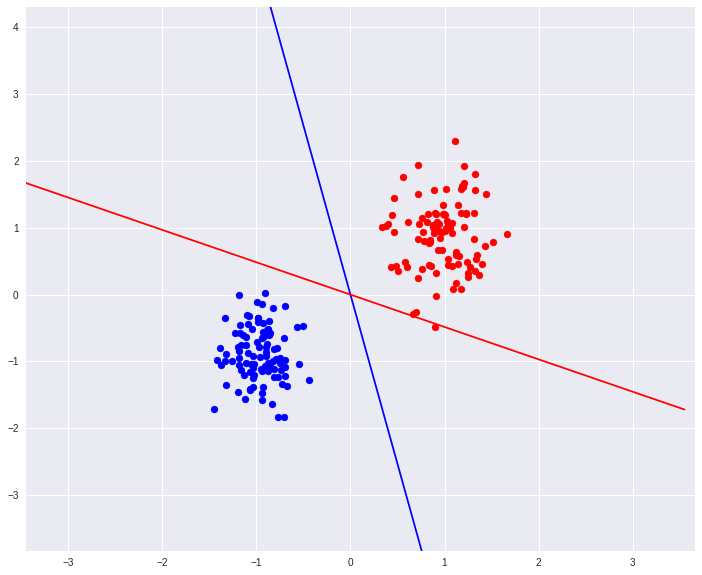

In [0]:
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
W_hat,b_hat = gradient_descent_softmax(X,y,P,0.1, 0.95, True)
plot_softmax_model(X,y,W_hat,b_hat,True)